In [1]:
import sys
sys.path.append("../..")

import pandas
import math

from bokeh.io import export_png, export_svgs
from bokeh.models import ColumnDataSource, DataTable, TableColumn
from pandas import DataFrame

# Import dictonaries and Types
from app.components.basic_dataframes import dictMealState, dfMealCode, dfMealState
from app.components.simple_types import Nutrition, State
from app.components.extract_data.extract_data import *

# Use simple function
from app.components.search.papa_search import papaSingleSeach, SearchResult, fitness

from app.components.graphs.polar import plot_multiple_polar_charts

from app.components.extract_data.dataframes.dictionaries.nutrients import nutrients_signal

import random
import pickle
from IPython.display import clear_output

# Use simple function
from app.components.search.papa_search import papaSingleSeach, SearchResult

#Import graphic
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(dpi=300)

Loading basic data
Loading basic dictionary
Finish!


<Figure size 1920x1440 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

In [2]:
from typing import Any

def nutritionAdequancy(nutrition: Nutrition, personID: str):
    return Nutrition.nutritionAdequancyByPersonId(nutrition, personID)
    idealNutrition = Nutrition.idealNutritionByPersonId(personID)
    greaters = [ nutrient for nutrient, signal in nutrients_signal.items() if signal==">"]
    less = [ nutrient for nutrient, signal in nutrients_signal.items() if signal=="<"]
    quantity = len(nutrients_signal)
    
    adequancy = 0.0
    for nutrient in greaters:
        adequancy += min(1.0, nutrition[nutrient]/idealNutrition[nutrient])/quantity
    
    for nutrient in less:
        adequancy += (1.0 if nutrition[nutrient]<=idealNutrition[nutrient] else 0.0 )/quantity
        
    return adequancy
  
# initialAdequancy = nutritionAdequancy(result.initialNutrition, personID)
# finalAdequancy = nutritionAdequancy(result.finalNutrition, personID)

# print("Greaters:", initialAdequancy, finalAdequancy )

In [3]:
personID = "UNKNOW"
personID = "110000016#7#1#5"
nutritionFactor = 100
nutritionFunction = Nutrition.absDifferenceNegativePenalty
distanceFactor=10
distanceFunction = State.squareDifference

In [82]:
def convergenceFirst(bestList: list[float]):
    for i in range(1, len(bestList)):
        if(bestList[i-1]<bestList[i]):
            return i
    return -1

In [111]:
value = 1000
def absDifferenceNegativePenalty(initNutrition, finalNutrition, mult=value) -> float:
        initNutrition: Nutrition = initNutrition
        finalNutrition: Nutrition = finalNutrition

        def calc(init: float, final: float, signal: str):
            if signal == ">":
                if init <= final:
                    return abs(init - final) * mult
                else:
                    # TODO: Try fix the energy
                    if init / final > 1.5:
                        # return abs(init - final) * mult
                        return abs(init - final)
                    else:
                        return abs(init - final)
            else:
                if init <= final:
                    return 0.0
                else:
                    return abs(init - final) * mult

        return sum(
            [
                (
                    calc(initNutrition[key], finalNutrition[key], nutrients_signal[key])
                    / finalNutrition[key]
                )
                for key in list(initNutrition)
            ]
        )

In [112]:
result = None
fileName = "penalization_" + ("%07d" % value)  + ".pickle"

try:
    with open("output/" + fileName, "rb") as file:
        result = pickle.load(file)
except:
    result = papaSingleSeach(
                    personID, 
                    verbose=True, 
                    unit=25, max_unit=2, 
                    max_population_set=50, 
                    max_population_selected=10, 
                    expansion_set=10, 
                    expansion_select=5, 
                    nutritionFitness=absDifferenceNegativePenalty, 
                    crossover=0.20, 
                    nutritionFactor=1, 
                    distanceFactor=0,
                    max_steps=50, 
                )
    with open("output/" + fileName, "wb") as file:
        pickle.dump(result, file)
    
# result = papaSingleSeach(
#                 personID, 
#                 verbose=True, 
#                 unit=25, max_unit=2, 
#                 max_population_set=100, 
#                 max_population_selected=50, 
#                 expansion_set=50, 
#                 expansion_select=10, 
#                 nutritionFitness=absDifferenceNegativePenalty, 
#                 crossover=0.2, 
#                 nutritionFactor=1, 
#                 distanceFactor=0,
#                 max_steps=20, 
#             )

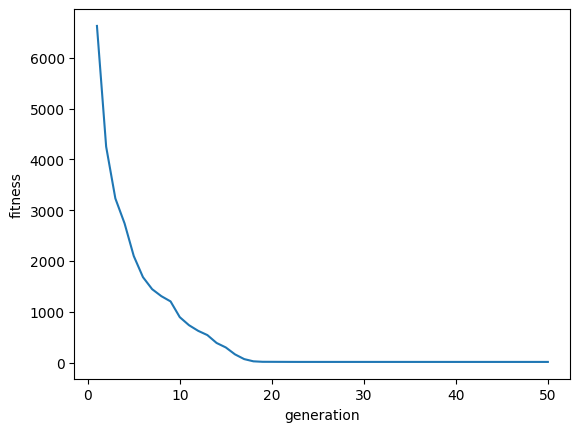

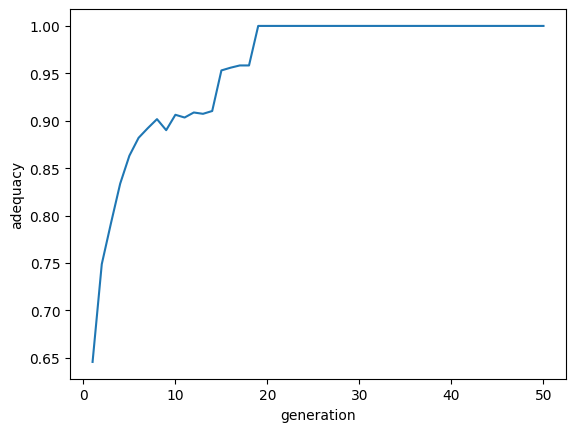

0.6059628985337808
0.9999999999999996
-1


In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.DataFrame({'generation': [ x+1 for x in range(len(result.bestList)) ], 'fitness': result.bestList})
sns.lineplot(data=data, x="generation", y="fitness")
plt.show()

data = pd.DataFrame({'generation': [ x+1 for x in range(len(result.adequacyList)) ], 'adequacy': result.adequacyList})
sns.lineplot(data=data, x="generation", y="adequacy")
plt.show()

print(nutritionAdequancy(result.initialNutrition, personID))
print(nutritionAdequancy(result.finalNutrition, personID))
print(convergenceFirst(result.bestList))

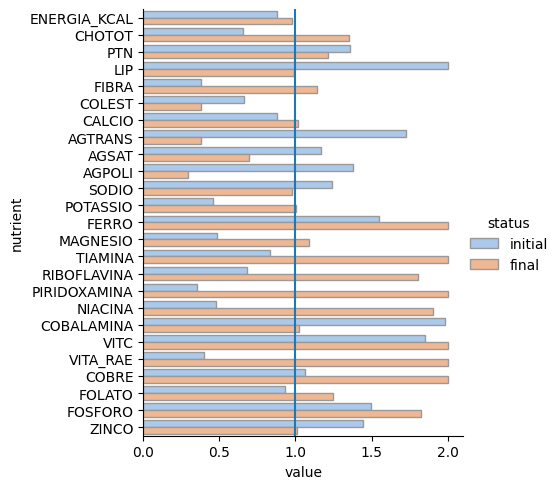

In [53]:
result.show_comparison_graph()

In [54]:
def convergenceFirst(bestList: list[float]):
    for i in range(1, len(bestList)):
        if(bestList[i-1]>=bestList[i]):
            return i
    return -1

In [55]:
def absDifferenceNegativePenalty(initNutrition, finalNutrition, mult=50007) -> float:
        initNutrition: Nutrition = initNutrition
        finalNutrition: Nutrition = finalNutrition

        def calc(init: float, final: float, signal: str):
            if signal == ">":
                if init <= final:
                    return abs(init - final) * mult
                else:
                    # TODO: Try fix the energy
                    if init / final > 1.5:
                        # return abs(init - final) * mult
                        return abs(init - final)
                    else:
                        return abs(init - final)
            else:
                if init <= final:
                    return 0.0
                else:
                    return abs(init - final) * mult

        return sum(
            [
                (
                    calc(initNutrition[key], finalNutrition[key], nutrients_signal[key])
                    / finalNutrition[key]
                )
                for key in list(initNutrition)
            ]
        )

In [133]:

values = [1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]
results = []
fileName = "adequancyTest.pickle"

try:
    with open("./output/" + fileName, "rb") as file:
        results = pickle.load(file)
except:
    for val in values:
        singleResult = []
        clear_output()
        print(val)
        for i in range(30):
            # clear_output()
            print("Starting", i)
            result = papaSingleSeach(
                personID, 
                    verbose=False, 
                    unit=25, max_unit=2, 
                    max_population_set=50, 
                    max_population_selected=10, 
                    expansion_set=10, 
                    expansion_select=5,  
                    crossover=0.20, 
                    nutritionFactor=1, 
                    distanceFactor=0,
                    max_steps=50,  
                    nutritionFitness= 
                        lambda initNutrition, finalNutrition : 
                                absDifferenceNegativePenalty(
                                    initNutrition, 
                                    finalNutrition,
                                    val 
                                    ), 
                    )
            singleResult.append( (nutritionAdequancy(result.finalNutrition, personID), 
                            convergenceFirst(result.bestList), result.bestList, result.adequacyList) )
        results.append(singleResult)
    with open("./output/" + fileName, "wb") as file:
        pickle.dump(results, file)
         
print(results)

[[(0.9020053685231435, 1, [10.26528073195276, 7.672674923534858, 6.246950298304309, 5.746716040532407, 5.269558828119752, 4.769695622346486, 4.532251126173179, 4.091825958902258, 3.922990488449007, 3.6445333611051165, 3.4567448719128873, 3.2750947394251155, 3.1718141666602717, 3.041225984371003, 2.9219331734224485, 2.885917983484453, 2.8506437434830416, 2.8031944850180492, 2.7380619985453865, 2.7293444888649936, 2.705226281911358, 2.6476898133015383, 2.619784307986721, 2.5505019061005627, 2.511536866062171, 2.483631360747356, 2.464371859020177, 2.4367063311961465, 2.4042249808219522, 2.399285130583206], [0.6001842119380931, 0.6967156620159666, 0.8004372758225181, 0.83058991417855, 0.8259672514724427, 0.8259576716456586, 0.8236227130002503, 0.8678323719696925, 0.8520815452125032, 0.8414884361731301, 0.8674468983480029, 0.8789973179715128, 0.8809499611690431, 0.8770469816928897, 0.8798719156374541, 0.8845052530261697, 0.8814670812413383, 0.8855289347942731, 0.8885841217054145, 0.88856310

In [ ]:
len(results[0][0])

4

In [176]:
sum( x>1.0 for x in results[5][9][3] )
sum(results[5][9][3])
[results[5][x][3][29] for x in range(30)]

[0.9999999999999996,
 0.9999999999999996,
 0.9999999999999996,
 0.9999999999999996,
 0.9999999999999996,
 0.9999999999999996,
 0.9999999999999996,
 0.9999999999999996,
 0.9999999999999996,
 0.9999999999999996,
 0.9583333333333329,
 0.9999999999999996,
 0.9999999999999996,
 0.9999999999999996,
 0.9999999999999996,
 0.9999999999999996,
 0.9999999999999996,
 0.9999999999999996,
 0.9999999999999996,
 0.9999999999999996,
 0.9999999999999996,
 0.9999999999999996,
 0.9583333333333329,
 0.9999999999999996,
 0.9999999999999996,
 0.9999999999999996,
 0.9999999999999996,
 0.9999999999999996,
 0.9999999999999996,
 0.9999999999999996]

Estrutura de dados final criada.
Número de experimentos: 8
Número de execuções por experimento: 30
Número de gerações por execução: 30

Processamento concluído. Médias e desvios padrão calculados para cada um dos 8 experimentos.


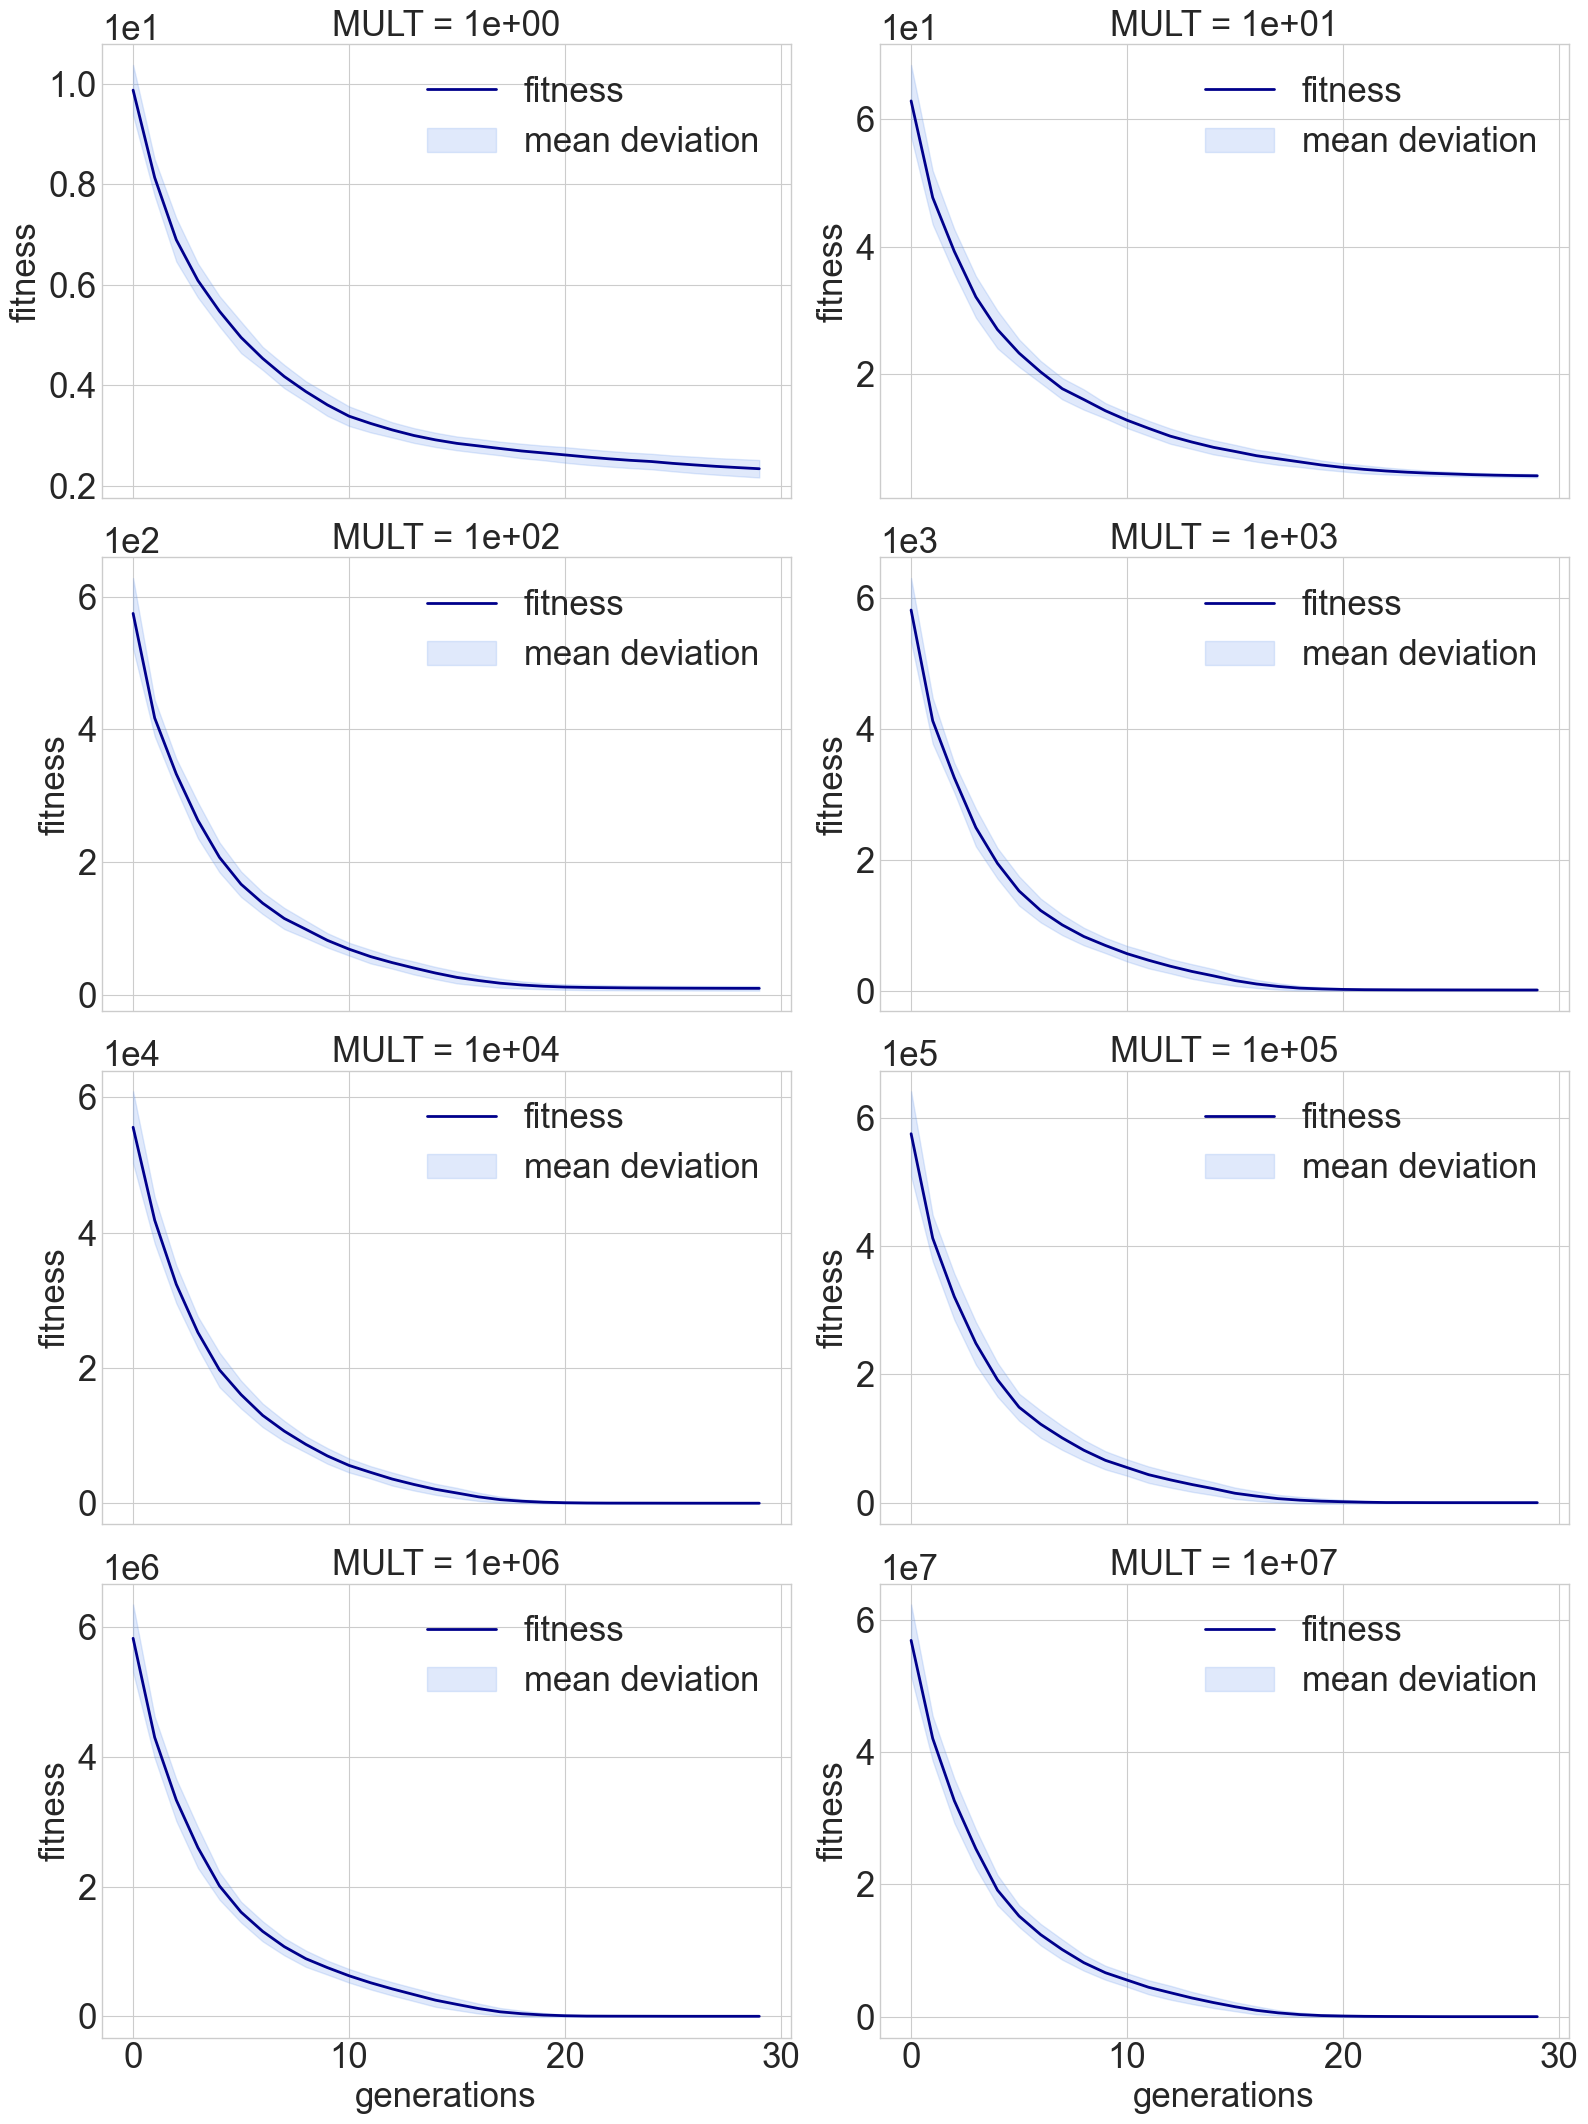

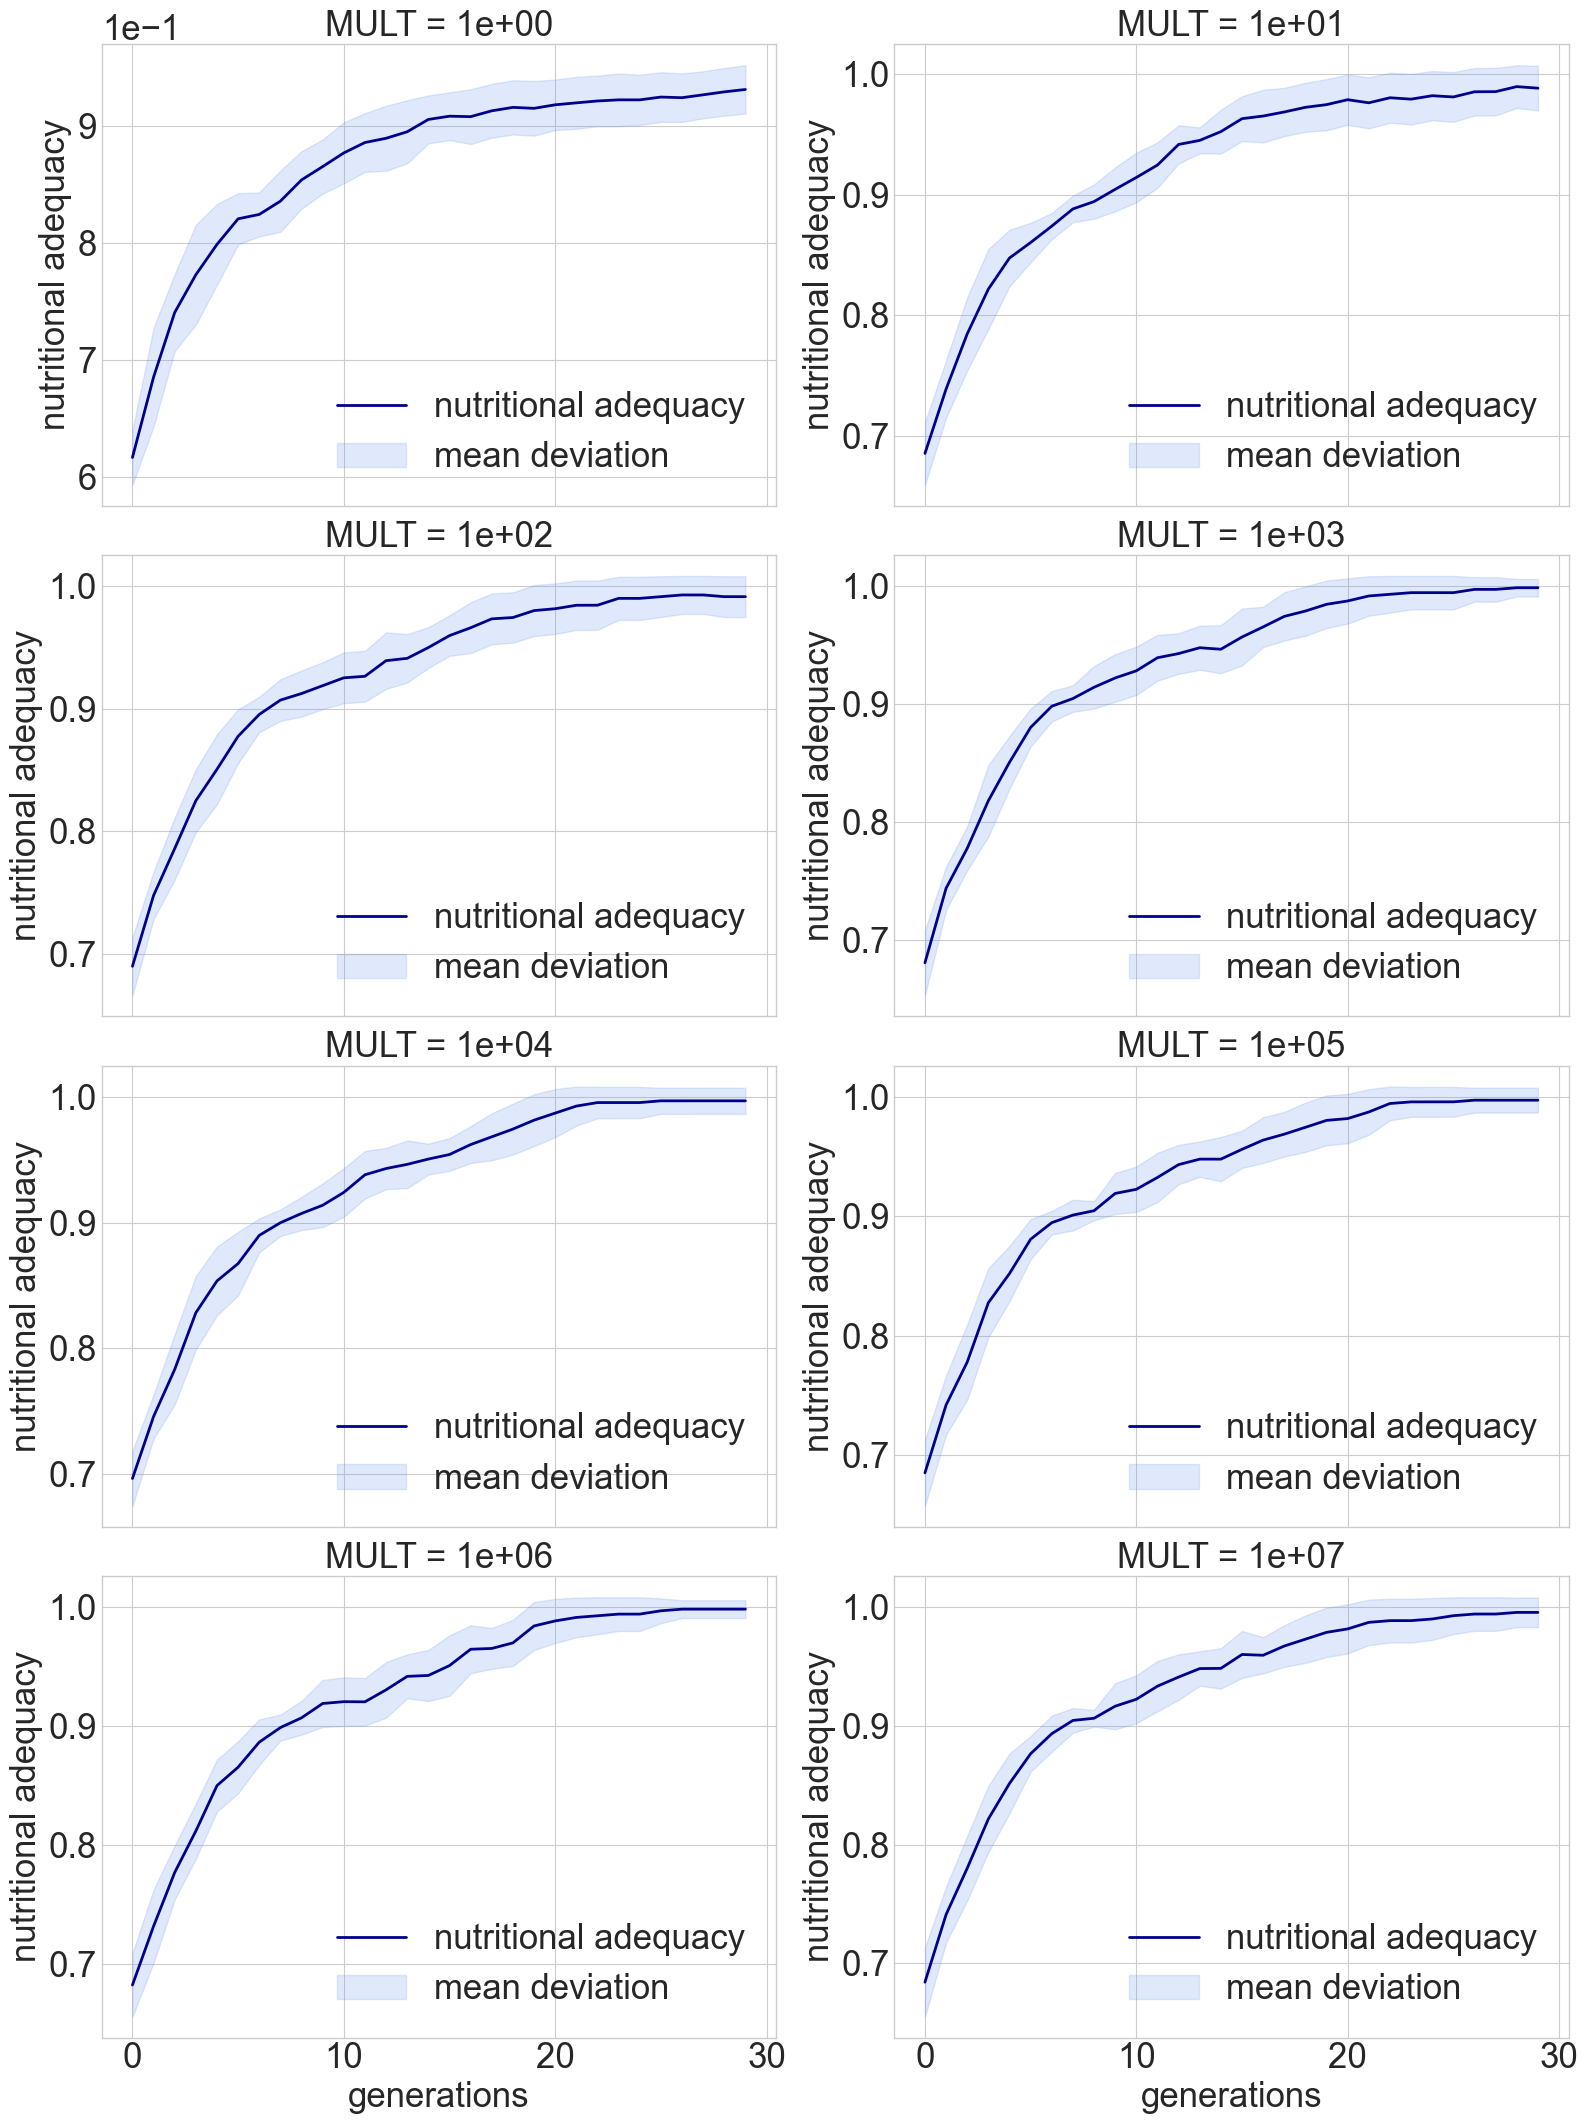

In [187]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

# Usando um estilo mais agradável para os gráficos
style.use('seaborn-v0_8-whitegrid')

# --------------------------------------------------------------------------
# PASSO 1: SIMULAÇÃO DOS DADOS (ESTRUTURA FINAL)
# Esta função cria dados FALSOS com a estrutura 8x30x4x30 que você descreveu.
# --------------------------------------------------------------------------
def criar_dados_finais_simulados():
    """Cria uma estrutura de dados simulada para a descrição final e correta."""
    return results

# ATENÇÃO: Substitua a linha abaixo pela sua variável real
# results = sua_variavel_real_aqui
results = criar_dados_finais_simulados()

print("Estrutura de dados final criada.")
print(f"Número de experimentos: {len(results)}")
print(f"Número de execuções por experimento: {len(results[0])}")
print(f"Número de gerações por execução: {len(results[0][0][2])}")

# --------------------------------------------------------------------------
# PASSO 2: PROCESSAMENTO E AGREGAÇÃO
# Para cada experimento, vamos agregar os resultados de suas 30 execuções.
# --------------------------------------------------------------------------

dados_processados = []

# Itera sobre cada um dos 8 EXPERIMENTOS
for experimento_data in results:
    
    # Coleta os vetores de geração de todas as 30 EXECUÇÕES
    # O resultado será uma lista com 30 arrays, onde cada array tem 30 elementos.
    execucoes_metrica_1 = [execucao_data[2] for execucao_data in experimento_data]
    execucoes_metrica_2 = [execucao_data[3] for execucao_data in experimento_data]
    
    # Converte para matrizes NumPy com formato (30, 30) -> 30 execuções, 30 gerações
    matriz_m1 = np.array(execucoes_metrica_1)
    matriz_m2 = np.array(execucoes_metrica_2)
    
    # Calcula a média e o desvio padrão AO LONGO DAS EXECUÇÕES (axis=0)
    # Isso resulta em um vetor de 30 médias e um de 30 desvios (um para cada geração)
    media_m1 = np.mean(matriz_m1, axis=0)
    std_m1 = np.std(matriz_m1, axis=0)
    
    media_m2 = np.mean(matriz_m2, axis=0)
    std_m2 = np.std(matriz_m2, axis=0)
    
    # Armazena o resultado processado para este experimento
    dados_processados.append({
        'metrica_1': {'media': media_m1, 'std': std_m1},
        'metrica_2': {'media': media_m2, 'std': std_m2}
    })

print("\nProcessamento concluído. Médias e desvios padrão calculados para cada um dos 8 experimentos.")

# --------------------------------------------------------------------------
# PASSO 3: GERAÇÃO DOS GRÁFICOS
# Gera os 8 sub-gráficos, cada um mostrando a média de suas 30 execuções.
# --------------------------------------------------------------------------

geracoes = np.arange(30)

def plotar_resultados_finais(dados, nome_metrica, y_label, titulo_figura= "" ):
    """
    Função para criar os gráficos de uma métrica específica,
    COM ESCALAS INDIVIDUAIS para o eixo Y de cada sub-gráfico.
    """
    
    # --- GUIA DE TAMANHOS DE FONTE ---
    # Sinta-se livre para ajustar estes valores
    TAMANHO_TITULO_SUBPLOT = 25
    TAMANHO_ROTULOS_EIXOS = 25
    TAMANHO_NUMEROS_EIXOS = 25
    TAMANHO_LEGENDA = 25
    TAMANHO_TITULO_GERAL = 25
    
    # A ÚNICA MUDANÇA É AQUI: removido o "sharey=True"
    fig, axes = plt.subplots(4, 2, figsize=(16, 22), sharex=True) 
    axes = axes.flatten()

    for i in range(len(dados)):
        ax = axes[i]
        media = dados[i][nome_metrica]['media']
        std = dados[i][nome_metrica]['std']
        
        # Plota a linha da média das 30 execuções
        ax.plot(geracoes, media, label=y_label, color='darkblue', lw=2)
        
        # Plota a área sombreada (Média ± Desvio Padrão)
        ax.fill_between(
            geracoes,
            media - std,
            media + std,
            alpha=0.2,
            color='cornflowerblue',
            label='mean deviation'
        )
        
        values = [1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]
        
        ax.set_title(f'MULT = ' + "%.0e" % values[i], fontsize=TAMANHO_TITULO_SUBPLOT)
        ax.set_ylabel(y_label, fontsize=TAMANHO_ROTULOS_EIXOS)
        # Define o tamanho da fonte da LEGENDA
        ax.legend(fontsize=TAMANHO_LEGENDA)
        
        # MELHORIA: Força o uso de notação científica no eixo Y para números grandes/pequenos.
        # Isso melhora a legibilidade para escalas como 1e7.
        # Define o tamanho da fonte dos NÚMEROS nos eixos (ticks)
        ax.tick_params(axis='both', which='major', labelsize=TAMANHO_NUMEROS_EIXOS)
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
        if i >= 6:
            ax.set_xlabel('generations', fontsize=TAMANHO_ROTULOS_EIXOS)
            
        ax.yaxis.get_offset_text().set_fontsize(TAMANHO_NUMEROS_EIXOS)
    
    # fig.suptitle(titulo_figura, fontsize=TAMANHO_TITULO_GERAL, y=0.99)
    # fig.suptitle(titulo_figura, fontsize=22, y=0.99)
    fig.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
    
# Gerar os gráficos para a Métrica 1 (Índice 2)
plotar_resultados_finais(dados_processados, nome_metrica='metrica_1', y_label="fitness",titulo_figura='Resultados da Métrica 1 (Índice 2)')

# Gerar os gráficos para a Métrica 2 (Índice 3)
plotar_resultados_finais(dados_processados, nome_metrica='metrica_2', y_label="nutritional adequacy", titulo_figura='Resultados da Métrica 2 (Índice 3)')

In [117]:
fileName = "adequancyTest.pickle"

with open("./output/" + fileName, "rb") as file:
    results = pickle.load(file)
len(results[0])

30

In [ ]:
import pandas as pd
import seaborn as sns
import statistics

import matplotlib.pyplot as plt
from numpy import mean
plt.figure(dpi=300)

In [ ]:
# Dados fornecidos
result000001 = [(0.6209784731773539, 2), (0.6217243825924297, 2), (0.6217243825924297, 2), (0.6221715836095731, 2), (0.6157514167276421, 2), (0.6209784731773539, 2), (0.6217243825924297, 2), (0.6217243825924297, 3), (0.6217243825924297, 2), (0.6209784731773539, 2), (0.6217243825924297, 2), (0.6221715836095731, 2), (0.6217151859587169, 2), (0.6217243825924297, 2), (0.6217151859587169, 2), (0.6217243825924297, 2), (0.6222435169180592, 2), (0.6217243825924297, 2), (0.6217243825924297, 2), (0.6214256741944973, 3), (0.6209784731773539, 2), (0.6217151859587169, 2), (0.6209784731773539, 2), (0.6209784731773539, 2), (0.6217243825924297, 2), (0.6217243825924297, 3), (0.6222435169180592, 2), (0.6209784731773539, 2), (0.6217243825924297, 2), (0.6209784731773539, 2)]
result000017 = [(0.6217243825924297, 2), (0.6209784731773539, 2), (0.6217243825924297, 2), (0.6217243825924297, 2), (0.6209784731773539, 2), (0.6217151859587169, 2), (0.6217243825924297, 2), (0.6217243825924297, 2), (0.6209784731773539, 2), (0.6217243825924297, 2), (0.6222435169180592, 2), (0.6217243825924297, 2), (0.6209784731773539, 2), (0.6221715836095731, 2), (0.6221715836095731, 2), (0.6209784731773539, 2), (0.6217243825924297, 2), (0.6217243825924297, 2), (0.6222435169180592, 2), (0.6222435169180592, 2), (0.6217243825924297, 2), (0.6209784731773539, 2), (0.6217243825924297, 2), (0.6217243825924297, 2), (0.6217243825924297, 2), (0.6209784731773539, 2), (0.6217151859587169, 2), (0.6217243825924297, 2), (0.6209784731773539, 2), (0.6209784731773539, 3)]
result000107 = [(0.6217243825924297, 2), (0.6217243825924297, 2), (0.6209784731773539, 3), (0.6222435169180592, 2), (0.6217243825924297, 2), (0.6209784731773539, 2), (0.6209784731773539, 2), (0.6209784731773539, 3), (0.6209784731773539, 2), (0.6222435169180592, 2), (0.6217243825924297, 2), (0.6209784731773539, 2), (0.6217151859587169, 3), (0.6209784731773539, 2), (0.6221715836095731, 2), (0.6209784731773539, 2), (0.6209784731773539, 2), (0.6217151859587169, 2), (0.6217243825924297, 2), (0.6217243825924297, 2), (0.6217243825924297, 2), (0.6217243825924297, 2), (0.6209784731773539, 2), (0.6209784731773539, 2), (0.6217243825924297, 2), (0.6217243825924297, 2), (0.6217243825924297, 2), (0.6217243825924297, 2), (0.6217243825924297, 2), (0.6209784731773539, 2)]
result001007 = [(0.6217151859587169, 2), (0.6209692765436411, 2), (0.6217151859587169, 2), (0.6217151859587169, 2), (0.6217151859587169, 2), (0.6217151859587169, 2), (0.6217151859587169, 2), (0.6217151859587169, 2), (0.6209692765436411, 2), (0.6217151859587169, 2), (0.6217151859587169, 2), (0.6217151859587169, 2), (0.6217151859587169, 2), (0.6217151859587169, 2), (0.6217151859587169, 2), (0.6217151859587169, 2), (0.6217151859587169, 2), (0.6217151859587169, 2), (0.6217151859587169, 2), (0.6217151859587169, 2), (0.6217151859587169, 2), (0.6209692765436411, 2), (0.6217151859587169, 2), (0.6217151859587169, 2), (0.6217151859587169, 2), (0.6217151859587169, 3), (0.6217151859587169, 2), (0.6217151859587169, 2), (0.6217151859587169, 2), (0.6217151859587169, 2)]
result005007 = [(0.7588938211995468, 3), (0.7588938211995468, 4), (0.7588938211995468, 5), (0.7588938211995468, 2), (0.7588938211995468, 2), (0.7588938211995468, 3), (0.7588938211995468, 3), (0.7588938211995468, 4), (0.758147911784471, 4), (0.7588938211995468, 3), (0.7588938211995468, 3), (0.7588938211995468, 4), (0.7588938211995468, 3), (0.7588938211995468, 5), (0.7588938211995468, 4), (0.7588938211995468, 4), (0.7588938211995468, 3), (0.7588938211995468, 4), (0.7588938211995468, 4), (0.7588938211995468, 4), (0.7588938211995468, 3), (0.7588938211995468, 3), (0.7588938211995468, 3), (0.7588938211995468, 3), (0.758147911784471, 4), (0.7588938211995468, 4), (0.7588938211995468, 3), (0.7588938211995468, 3), (0.7588938211995468, 3), (0.7588938211995468, 3)]
result010007 = [(0.8841060324528095, 9), (0.8841060324528095, 8), (0.8803594999538784, 9), (0.8840907193400259, 6), (0.8840907193400259, 3), (0.8841060324528095, 3), (0.8841060324528095, 8), (0.8946939902539907, 4), (0.8841060324528095, 10), (0.8841060324528095, 5), (0.8841060324528095, 4), (0.8841060324528095, 9), (0.8841060324528095, 8), (0.8841060324528095, 8), (0.8841060324528095, 7), (0.8841060324528095, 4), (0.8807947671307249, 6), (0.8841060324528095, 6), (0.8841060324528095, 10), (0.8841060324528095, 8), (0.8841060324528095, 7), (0.8005215556372678, 7), (0.8907143236628742, 7), (0.8807794540179413, 6), (0.8840907193400259, 9), (0.8840907193400259, 6), (0.8803594999538784, 9), (0.8841060324528095, 6), (0.8803594999538784, 8), (0.8770482346317938, 5)]
result050007 = [(0.9518764625178886, 10), (0.9543303118884808, 11), (0.9518764625178886, 11), (0.8749139054131057, 12), (0.9533840120955689, 15), (0.9553420240340308, 13), (0.9533840120955689, 18), (0.9543303118884808, 7), (0.9156717458689462, 14), (0.9533840120955689, 10), (0.9518764625178886, 11), (0.9543973224703615, 13), (0.9159653180671916, 23), (0.9518764625178886, 13), (0.9533840120955689, 15), (0.9533840120955689, 14), (0.9532168735099154, 17), (0.9553537067837781, 12), (0.9533767634989143, 13), (0.9533840120955689, 11), (0.9533767634989143, 17), (0.9581141532500955, 17), (0.9533840120955689, 16), (0.8747962985754988, 14), (0.8749139054131057, 12), (0.9543973224703615, 14), (0.9581141532500955, 13), (0.9533840120955689, 17), (0.9518764625178886, 11), (0.9581141532500955, 11)]
result100007 = [(0.9160881846153849, 19), (0.9564640230893103, 17), (0.9555482188034191, 20), (0.9575488911680915, 18), (0.9577071361823365, 28), (0.9554520673831488, 19), (0.956945728774929, 16), (0.9555446005698008, 18), (0.9578054723646726, 17), (0.9559544695156699, 21), (0.9559544695156699, 11), (0.9565929367521371, 15), (0.9578944239316243, 16), (0.9555446005698008, 22), (0.9595465656780499, 16), (0.9587097867790516, 21), (0.9575488911680915, 15), (0.9590363555555559, 19), (0.9990800934472938, 18), (0.9575488911680915, 18), (0.9571743565146261, 15), (0.9555482188034191, 19), (0.9577564853230405, 19), (0.9573573161420317, 17), (0.9589298375416493, 17), (0.9576684752136755, 19), (0.9588447886039889, 17), (0.9175436303333467, 19), (0.9576755555555558, 14), (0.9579124809116812, 19)]

# Converte os dados para um DataFrame unificado
df_000001 = pd.DataFrame(result000001, columns=['Nutritional Adequacy', 'Geração'])
df_000017 = pd.DataFrame(result000017, columns=['Nutritional Adequacy', 'Geração'])
df_000107 = pd.DataFrame(result000107, columns=['Nutritional Adequacy', 'Geração'])
df_001007 = pd.DataFrame(result001007, columns=['Nutritional Adequacy', 'Geração'])

# Converte os dados para um DataFrame unificado
df_005007 = pd.DataFrame(result005007, columns=['Nutritional Adequacy', 'Geração'])
df_010007 = pd.DataFrame(result010007, columns=['Nutritional Adequacy', 'Geração'])
df_050007 = pd.DataFrame(result050007, columns=['Nutritional Adequacy', 'Geração'])
df_100007 = pd.DataFrame(result100007, columns=['Nutritional Adequacy', 'Geração'])

df_000001['λ'] = 'λ = 1'
df_000017['λ'] = 'λ = 17'
df_000107['λ'] = 'λ = 107'
df_001007['λ'] = 'λ = 1007'
df_combined = pd.concat([df_000001, df_000017, df_000107, df_001007])

df_005007['λ'] = 'λ = 5007'
df_010007['λ'] = 'λ = 10007'
df_050007['λ'] = 'λ = 50007'
df_100007['λ'] = 'λ = 100007'
df_combined2 = pd.concat([df_005007, df_010007, df_050007, df_100007])

sns.set_theme(style="whitegrid")

plt.subplots(figsize=(10, 6))
sns.violinplot(data=df_combined, x='λ', y='Nutritional Adequacy', 
               bw_adjust=.5, cut=1, linewidth=1, hue='λ', 
               legend=False, palette="Set1")
plt.figure(dpi=360)
plt.show()

plt.subplots(figsize=(10, 6))
sns.violinplot(data=df_combined2, x='λ', y='Nutritional Adequacy', 
               bw_adjust=.5, cut=1, linewidth=1, hue='λ', 
               legend=False, palette="Set2")
plt.figure(dpi=360)
plt.show()

def means(a:list[tuple]):
    adequancy = statistics.mean( [ x[0] for x in a ]  )
    generations = statistics.mean( [ x[1] for x in a ]  )
    return (adequancy, generations)

print( means(result000001) )
print( means(result000017) )
print( means(result000107) )
print( means(result001007) )

print( means(result005007) )
print( means(result010007) )
print( means(result050007) )
print( means(result100007) )

In [ ]:
# result.get_df()

,Nutrient,Initial Value,Final Value,Target Value
0,ENERGIA_KCAL,1728.680000,1812.030000,1971.590000
1,CHOTOT,36.187179,70.066941,55.000000
2,PTN,13.562414,11.116165,10.000000
3,LIP,17.443059,6.464407,6.666667
4,FIBRA,11.700000,37.500000,31.000000
5,COLEST,198.390000,101.110000,300.000000
6,CALCIO,763.840000,872.120000,868.000000
7,AGTRANS,0.768050,0.176548,0.444444
8,AGSAT,5.201609,2.898595,4.444444
9,AGPOLI,3.667334,0.925385,2.666667
